# **ML LAB ASSIGNMENT 9**
## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification(n_classes=2, n_features=2, n_samples=400, n_redundant=0, random_state=42)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **1. Support Vector Machine with Linear Kernel**

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred = svc_lin.predict(X_test)
print(f"Accuracy Score of SVC with Linear kernal is: {accuracy_score(y_test, y_pred)}")

Accuracy Score of SVC with Linear kernal is: 0.9625


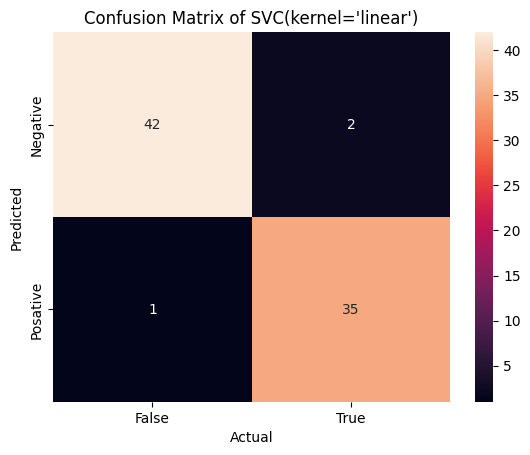

In [8]:
cm_lin = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lin, annot=True, xticklabels=["False", "True"], yticklabels=["Negative", "Posative"])
plt.title("Confusion Matrix of SVC(kernel='linear')")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

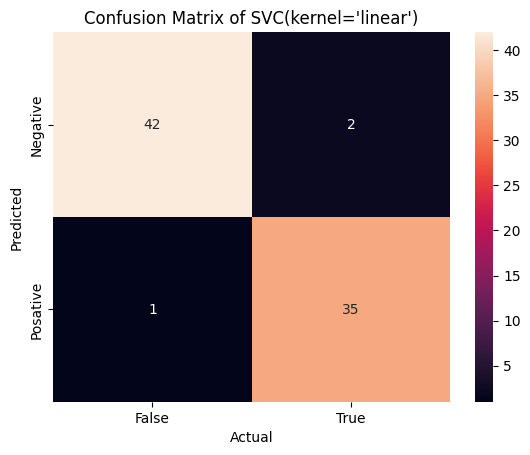

Text(0.5, 1.0, 'Decision Boundaries of Support Vector Classifier with RBF Kernel')

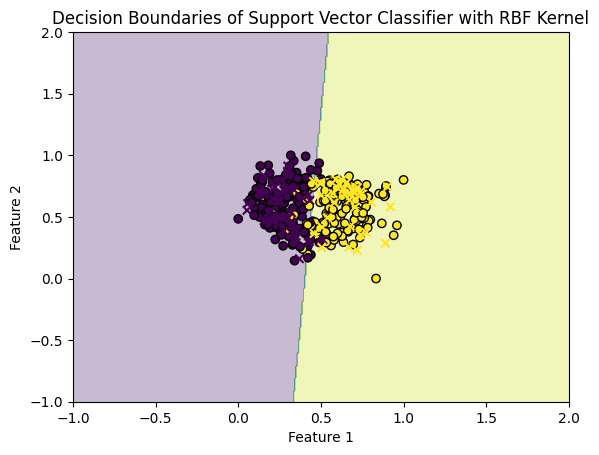

In [9]:

cm_lin = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lin, annot=True, xticklabels=["False", "True"], yticklabels=["Negative", "Posative"])
plt.title("Confusion Matrix of SVC(kernel='linear')")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
Z = svc_lin.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of Support Vector Classifier with RBF Kernel")

# **Support Vector Machine with RBF Kernel**

Accuracy Score of SVC with RBF kernel is: 0.95


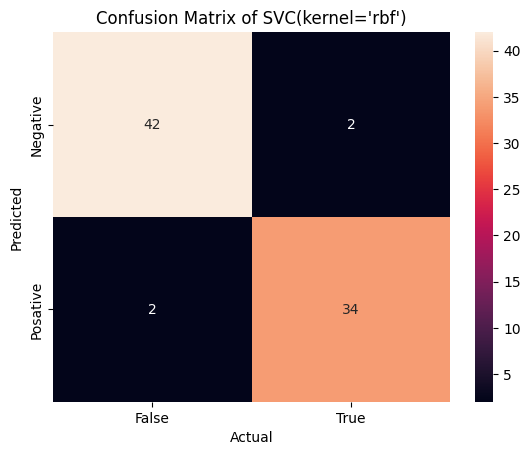

In [10]:
svc_rbf = SVC(kernel='rbf', gamma=50)
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)
print(f"Accuracy Score of SVC with RBF kernel is: {accuracy_score(y_test, y_pred)}")
cm_rbf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rbf, annot=True, xticklabels=["False", "True"], yticklabels=["Negative", "Posative"])
plt.title("Confusion Matrix of SVC(kernel='rbf')")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Text(0.5, 1.0, 'Decision Boundaries of Support Vector Classifier with RBF Kernel')

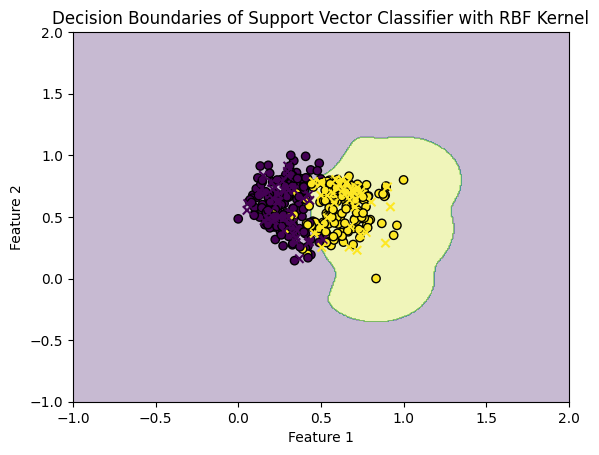

In [11]:

x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of Support Vector Classifier with RBF Kernel")

# **2. Principal Component Analysis**

In [45]:
data = pd.read_csv("book1.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


In [46]:
data = data.drop(['furnishingstatus'], axis=1)
X = data.drop(['price'], axis=1)
y = data['price']

y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [47]:
scaler2 = MinMaxScaler()
X_scaled = scaler2.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
Xfeatures = X_scaled
Xfeatures.head()

,area,bedrooms,bathrooms,stories,parking
0,0.356777,0.50,0.333333,0.666667,0.666667
1,0.469597,0.50,1.000000,1.000000,1.000000
2,0.542857,0.25,0.333333,0.333333,0.666667
3,0.362637,0.50,0.333333,0.333333,1.000000
4,0.356777,0.50,0.000000,0.333333,0.666667


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(Xfeatures)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## **Multiple Regression**

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [51]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [52]:
print("Multiple Regression Metrics:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Multiple Regression Metrics:
Mean Squared Error: 1783532463552.9600
Mean Absolute Error: 1080643.9577
R² Score: 0.3008


## **Decision Tree Regression**

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [54]:
# Compute errors for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [55]:
print("\nDecision Tree Metrics:")
print(f"Mean Squared Error: {mse_dt:.4f}")
print(f"Mean Absolute Error: {mae_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")


Decision Tree Metrics:
Mean Squared Error: 4642630829560.8887
Mean Absolute Error: 1696577.8667
R² Score: -0.8201
